# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    i = 1
    xp = x0
    Fderp = fder(xp)
    x = xp - f(xp) / Fderp
    Fder = fder(x)
    F = f(x)
    q = F / Fder**2 *(Fder - Fderp)/(x - xp)
    err = np.abs(q * (x-xp) / (1-q))
                 
    while (i < maxiter) and (np.abs(x-xp) >  eps or err > eps):
            xp = x
            Fderp = Fder
            x = xp - F / Fderp
            Fder = fder(x)
            i = i + 1
            F = f(x)
            q = F / Fder**2 *(Fder - Fderp)/(x - xp)
            err = np.abs(q * (x-xp) / (1-q))
    return x, i, err

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [55]:
for i in range(5):
    sol = newton_iteration(lambda x: x*x - 4, lambda x: 2 * x, i*10 - 15, eps=1e-5, maxiter=1000)
    print('x0', i*10 - 15, "root ", "%.6f" % (sol[0]), 'iter ', sol[1], 'rating error ',(sol[2]))

x0 -15 root  -2.000000 iter  6 rating error  3.416146459616179e-22
x0 -5 root  -2.000000 iter  4 rating error  1.7385756670958942e-17
x0 5 root  2.000000 iter  4 rating error  1.7385756670958942e-17
x0 15 root  2.000000 iter  6 rating error  3.416146459616179e-22
x0 25 root  2.000000 iter  7 rating error  0.0


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [61]:
def newton_upgrade(f, fder, x0, eps=1e-5, maxiter=1000, m=1):
    i = 1
    xp = x0
    Fderp = fder(xp)
    x = xp - m * f(xp) / Fderp
    Fder = fder(x)
    F = f(x)
    err = np.abs(x - xp) #here I don't not how value error more frank then step.
    while (i < maxiter) and (err >  eps ):
            xp = x
            Fderp = Fder
            x = xp - m *  F / Fderp
            Fder = fder(x)
            i = i + 1
            F = f(x)
            err = np.abs(x - xp)
    return x, i

In [64]:
for i in range(4):
    for m in range(1, 6): # but really take m = 5 don have sence, it is easy to demonstrate that there is convergence if m in algotitm less 2*m in fuction
        sol = newton_upgrade(lambda x: (x*x - 4)**2, lambda x: 4*(x*x - 4)* x, i*10 - 15, eps=1e-5, maxiter=1000,m=m)
        print('x0', i*10 - 15,'m', m, "root ", "%.5f" % (sol[0]), 'iter ', sol[1])

x0 -15 m 1 root  -2.00001 iter  23
x0 -15 m 2 root  -2.00000 iter  6
x0 -15 m 3 root  -2.00000 iter  18
x0 -15 m 4 root  -0.26667 iter  1000
x0 -15 m 5 root  3.59705 iter  1000
x0 -5 m 1 root  -2.00001 iter  19
x0 -5 m 2 root  -2.00000 iter  4
x0 -5 m 3 root  -2.00000 iter  16
x0 -5 m 4 root  -0.80000 iter  1000
x0 -5 m 5 root  4.26504 iter  1000
x0 5 m 1 root  2.00001 iter  19
x0 5 m 2 root  2.00000 iter  4
x0 5 m 3 root  2.00000 iter  16
x0 5 m 4 root  0.80000 iter  1000
x0 5 m 5 root  -4.26504 iter  1000
x0 15 m 1 root  2.00001 iter  23
x0 15 m 2 root  2.00000 iter  6
x0 15 m 3 root  2.00000 iter  18
x0 15 m 4 root  0.26667 iter  1000
x0 15 m 5 root  -3.59705 iter  1000


<IPython.core.display.Javascript object>


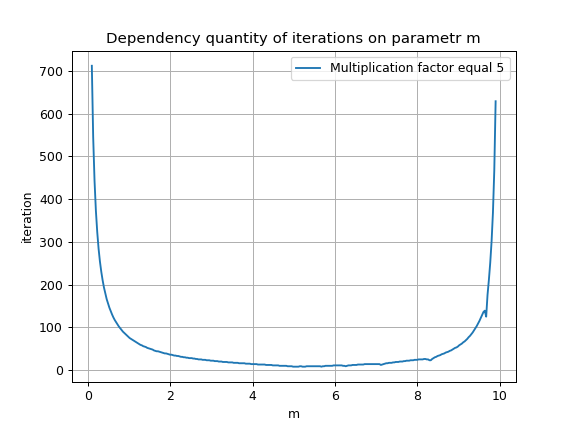

<IPython.core.display.Javascript object>


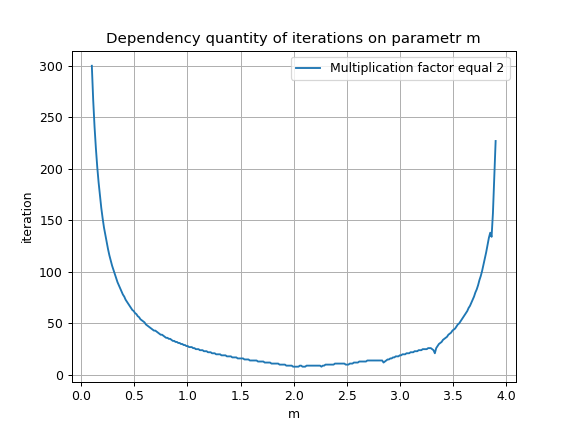

Text(0, 0.5, 'iteration')

In [106]:
%matplotlib notebook
# Here I want to demostrate how amount of iteration depend on "m"

m0 = 5
x0 = 58
m = np.linspace(0.1, 2*m0-0.1, 300)
count = np.zeros_like(m)
for i in range(300):
    count[i] = newton_upgrade(lambda x: (x*x - 4)**m0, lambda x: 2 * m0 * (x*x - 4)**(m0-1)* x, x0 , eps=1e-5, maxiter=1000,m=m[i])[1]
s = 'Multiplication factor equal %d' % m0
plt.plot(m, count, label= s)
plt.title('Dependency quantity of iterations on parametr m')
plt.legend()
plt.grid()
plt.xlabel('m')
plt.ylabel('iteration')


plt.figure()
m0 = 2
m = np.linspace(0.1, 2*m0-0.1, 300)
count = np.zeros_like(m)
for i in range(300):
    count[i] = newton_upgrade(lambda x: (x*x - 4)**m0, lambda x: 2 * m0 * (x*x - 4)**(m0-1)* x, x0 , eps=1e-5, maxiter=1000,m=m[i])[1]
s = 'Multiplication factor equal %d' % m0
plt.plot(m, count, label= s)
plt.title('Dependency quantity of iterations on parametr m')
plt.legend()
plt.grid()
plt.xlabel('m')
plt.ylabel('iteration')


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

<IPython.core.display.Javascript object>


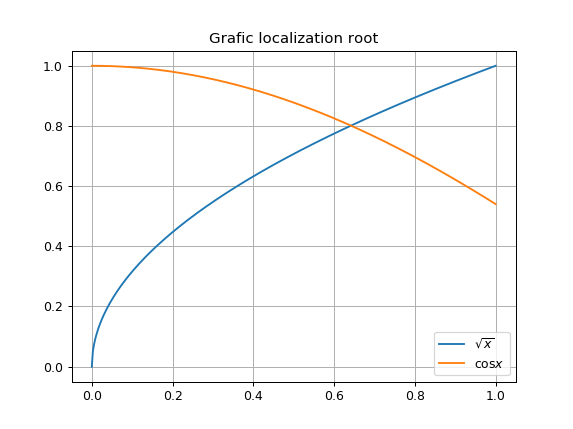

Text(0.5, 1.0, 'Grafic localization root')

In [195]:
x = np.linspace(0, 1, 400)
plt.plot(x, np.sqrt(x), label = r'$\sqrt{x}$')
plt.plot(x, np.cos(x), label = r'$\cos{x}$')
plt.legend()
plt.grid()
plt.title('Grafic localization root')
# Consquently root is supposed to be in (0.61 , 0.68)

In [132]:
# I misunderstood what U meant "fixed-point iteration", to be formal,  newton belong that type of methods"
def solution(eps, x0=1):
     return newton_iteration(lambda x:np.sqrt(x) - np.cos(x), lambda x: 1 / 2 / np.sqrt(x) + np.sin(x), x0, eps, maxiter=1000)

In [131]:
solution(eps=1e-8, x0 = 0.66)

(0.6417143708728826, 2, 0.0)

In [182]:
def fixed_point(f, l, x0, eps=1e-5, maxiter=1000):
    i = 1
    xp = x0
    Fp = f(xp)
    x = xp - Fp
    F = f(x)
    q = 1 - l*(F - Fp)/(x - xp) # rating derivation
    err = np.abs(q * (x-xp) / (1-q))
                 
    while (i < maxiter) and (np.abs(x-xp) >  eps or err > eps):
            xp = x
            Fp = F
            x = xp - l*Fp
            if x < 0: #only is banded with our function with area of argument > 0
                i = maxiter*10
                break
            i = i + 1
            F = f(x)
            q = 1 - l*(F - Fp)/(x - xp)
            err = np.abs(q * (x-xp) / (1-q))
    #print(i)
    return x, i, err

In [185]:
alpha = np.linspace(0.03, 1.6, 200)
iteration = np.zeros_like(alpha)
for i in range(200):
    iteration[i] = fixed_point(lambda x:np.sqrt(x) - np.cos(x), l = alpha[i], x0=0.66)[1]

<IPython.core.display.Javascript object>


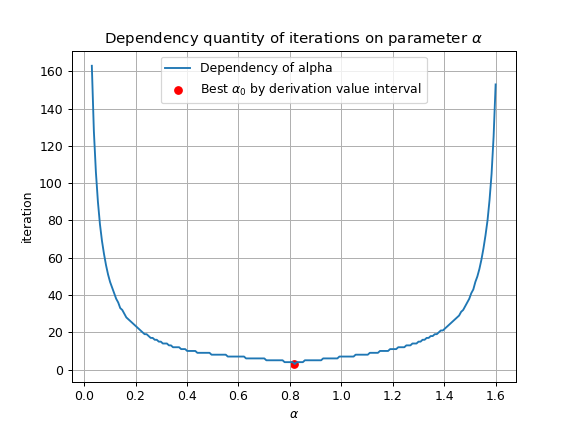

Text(0, 0.5, 'iteration')

In [198]:
plt.figure()
plt.title(r'Dependency quantity of iterations on parameter $\alpha$')
plt.plot(alpha, iteration, label='Dependency of alpha')

a = 0.61
b = 0.68
m = 1 / 2 / np.sqrt(a) + np.sin(a)
M = 1 / 2 / np.sqrt(b) + np.sin(b)
alpha_0 = 2/(m + M)

plt.scatter(alpha_0, fixed_point(lambda x:np.sqrt(x) - np.cos(x), l = alpha_0, x0=0.66)[1], label = r'Best $\alpha_0$ by derivation value interval', c = 'red')

plt.legend()
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('iteration')

#### Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [247]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    i = 1
    xp = x0
    Fderp = fder(xp)
    x = xp - f(xp) / Fderp
    Fder = fder(x)
    F = f(x)
    q = F / Fder**2 *(Fder - Fderp)/(x - xp)
    err = abs(q * (x-xp) / (1-q))
             
    while (i < maxiter) and (abs(x-xp) >  eps or err > eps):
            xp = x
            Fderp = Fder
            x = xp - F / Fderp
            Fder = fder(x)
            i = i + 1
            F = f(x)
            q = F / Fder**2 *(Fder - Fderp)/(x - xp)
            err = abs(q * (x-xp) / (1-q))
    return x, i, err

<IPython.core.display.Javascript object>


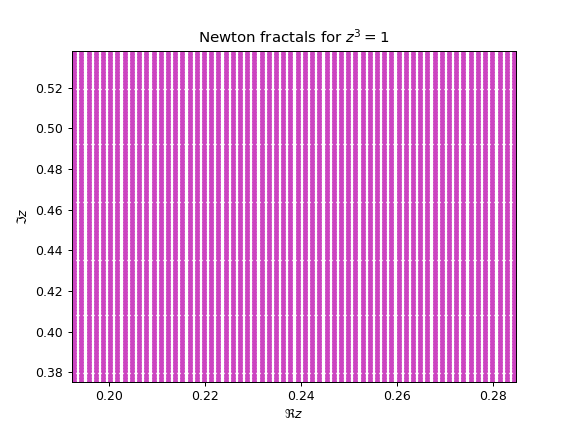

In [256]:
init = np.linspace(-1.5, 1.5, 2000)
real, imag = np.meshgrid(init,init)
init = real + 1j*imag
init = init.reshape(-1,)
res = init.copy()

for i in range(init.shape[0]):
    res[i] = newton_iteration(lambda z:z**3 -1, lambda z:3*z*z, init[i], eps=1e-7)[0]
root = np.exp(np.arange(0, 3) * 2 * np.pi * 1j / 3)
x0 = init[abs(res - root[0]) < 1e-4]
x1 = init[abs(res - root[1]) < 1e-4]
x2 = init[abs(res - root[2]) < 1e-4]


<IPython.core.display.Javascript object>


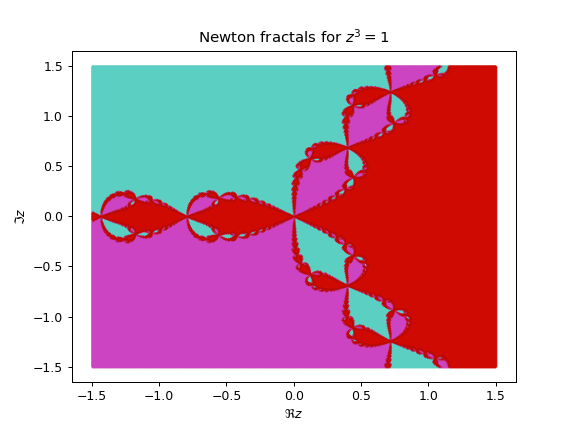

In [264]:
plt.figure()
plt.title(r'Newton fractals for $z^3 = 1$')
plt.xlabel(r'$\Re\,z$')
plt.ylabel(r'$\Im\,z$')
plt.plot(x1.real, x1.imag, '.', c='#5BD0C2', ms=0.1)
plt.plot(x2.real, x2.imag, '.', c='#CC44C1', ms=0.1)
plt.plot(x0.real, x0.imag, '.', c='#CF0A02', ms=0.1)